In [1]:
# Overview:

# This dataset is a snapshot of a fictional retail landscape, capturing essential attributes that drive retail operations and customer interactions. It includes key details such as:

# 1. Transaction ID: A unique identifier for each transaction, allowing tracking and reference.

# 2. Date: The date when the transaction occurred, providing insights into sales trends over time.

# 3. Customer ID: A unique identifier for each customer, enabling customer-centric analysis.

# 4.Gender: The gender of the customer (Male/Female), offering insights into gender-based purchasing patterns.

# 5.Age: The age of the customer, facilitating segmentation and exploration of age-related influences.

# 6.Product Category: The category of the purchased product (e.g., Electronics, Clothing, Beauty), helping understand product preferences.

# 7.Quantity: The number of units of the product purchased, contributing to insights on purchase volumes.

# 8.Price per Unit: The price of one unit of the product, aiding in calculations related to total spending.

# 9.Total Amount: The total monetary value of the transaction, showcasing the financial impact of each purchase.

# These attributes enable a multifaceted exploration of sales trends, demographic influences, and purchasing behaviors.

# Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

C:\Users\sumit\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Importing Dataset

In [3]:
data = pd.read_csv(r'E:\Data Science\Oasis Infobyte Project And Dataset\retail_sales_dataset.csv')

In [4]:
data.head(10)

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100
5,6,2023-04-25,CUST006,Female,45,Beauty,1,30,30
6,7,2023-03-13,CUST007,Male,46,Clothing,2,25,50
7,8,2023-02-22,CUST008,Male,30,Electronics,4,25,100
8,9,2023-12-13,CUST009,Male,63,Electronics,2,300,600
9,10,2023-10-07,CUST010,Female,52,Clothing,4,50,200


In [5]:
data.tail(10)

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
990,991,2023-12-26,CUST991,Female,34,Clothing,2,50,100
991,992,2023-08-21,CUST992,Female,57,Electronics,2,30,60
992,993,2023-02-06,CUST993,Female,48,Electronics,3,50,150
993,994,2023-12-18,CUST994,Female,51,Beauty,2,500,1000
994,995,2023-04-30,CUST995,Female,41,Clothing,1,30,30
995,996,2023-05-16,CUST996,Male,62,Clothing,1,50,50
996,997,2023-11-17,CUST997,Male,52,Beauty,3,30,90
997,998,2023-10-29,CUST998,Female,23,Beauty,4,25,100
998,999,2023-12-05,CUST999,Female,36,Electronics,3,50,150
999,1000,2023-04-12,CUST1000,Male,47,Electronics,4,30,120


# Performing EDA

In [6]:
# what are the datatypes 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [7]:
# getting rows and columns 
data.shape

(1000, 9)

In [8]:
# are there any missing values 
data.isnull().sum()

Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64

In [9]:
# is there any duplicated value 
data.duplicated().sum()

0

In [10]:
# checking Data Types 
data.dtypes

Transaction ID       int64
Date                object
Customer ID         object
Gender              object
Age                  int64
Product Category    object
Quantity             int64
Price per Unit       int64
Total Amount         int64
dtype: object

# Descriptive Statistics:

In [11]:
df = data.describe()
print(df)

       Transaction ID         Age     Quantity  Price per Unit  Total Amount
count     1000.000000  1000.00000  1000.000000     1000.000000   1000.000000
mean       500.500000    41.39200     2.514000      179.890000    456.000000
std        288.819436    13.68143     1.132734      189.681356    559.997632
min          1.000000    18.00000     1.000000       25.000000     25.000000
25%        250.750000    29.00000     1.000000       30.000000     60.000000
50%        500.500000    42.00000     3.000000       50.000000    135.000000
75%        750.250000    53.00000     4.000000      300.000000    900.000000
max       1000.000000    64.00000     4.000000      500.000000   2000.000000


In [12]:
# getting 5 point summary of data
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Transaction ID,1000.0,500.500,288.819436,1.0,250.75,500.5,750.25,1000.0
Age,1000.0,41.392,13.681430,18.0,29.00,42.0,53.00,64.0
Quantity,1000.0,2.514,1.132734,1.0,1.00,3.0,4.00,4.0
Price per Unit,1000.0,179.890,189.681356,25.0,30.00,50.0,300.00,500.0
Total Amount,1000.0,456.000,559.997632,25.0,60.00,135.0,900.00,2000.0


In [13]:
# Total Quantity 
data['Quantity'].sum()

2514

In [14]:
# uniques values of the dataset
data.nunique()

Transaction ID      1000
Date                 345
Customer ID         1000
Gender                 2
Age                   47
Product Category       3
Quantity               4
Price per Unit         5
Total Amount          18
dtype: int64

# Getting Categorical And Numerical Veriable

In [15]:
# numerical columns
numerical_data = data.select_dtypes(exclude = ['object']).columns
print("Numerical columns: ",numerical_data)

Numerical columns:  Index(['Transaction ID', 'Age', 'Quantity', 'Price per Unit', 'Total Amount'], dtype='object')


In [16]:
# categorical columns
categorical_data = data.select_dtypes(include = ['object']).columns
print("Categorical columns: ",categorical_data)

Categorical columns:  Index(['Date', 'Customer ID', 'Gender', 'Product Category'], dtype='object')


# Adding Month Column In dataset

In [17]:
# seeing the date column
data['Date'] = pd.to_datetime(data['Date'])
# add 'month' column and extract month from date
data['Month'] = data['Date'].dt.month_name()
data['Month']

0      November
1      February
2       January
3           May
4           May
         ...   
995         May
996    November
997     October
998    December
999       April
Name: Month, Length: 1000, dtype: object

# Month Column Added to the dataset

In [18]:
data

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,Month
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150,November
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000,February
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30,January
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500,May
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100,May
...,...,...,...,...,...,...,...,...,...,...
995,996,2023-05-16,CUST996,Male,62,Clothing,1,50,50,May
996,997,2023-11-17,CUST997,Male,52,Beauty,3,30,90,November
997,998,2023-10-29,CUST998,Female,23,Beauty,4,25,100,October
998,999,2023-12-05,CUST999,Female,36,Electronics,3,50,150,December


In [19]:
# Total Rows And Columns 
data.shape

(1000, 10)

In [20]:
# Total Columns Names
data.columns

Index(['Transaction ID', 'Date', 'Customer ID', 'Gender', 'Age',
       'Product Category', 'Quantity', 'Price per Unit', 'Total Amount',
       'Month'],
      dtype='object')

# Reindexing The Month Column

In [21]:
# # Reindexing The Columns
data = data.reindex(columns=['Transaction ID','Date', 'Month', 'Customer ID', 'Gender', 'Age', 'Product Category', 'Quantity',
        'Price per Unit', 'Total Amount'])

In [22]:
data

,Transaction ID,Date,Month,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,November,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,February,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,January,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,May,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,May,CUST005,Male,30,Beauty,2,50,100
...,...,...,...,...,...,...,...,...,...,...
995,996,2023-05-16,May,CUST996,Male,62,Clothing,1,50,50
996,997,2023-11-17,November,CUST997,Male,52,Beauty,3,30,90
997,998,2023-10-29,October,CUST998,Female,23,Beauty,4,25,100
998,999,2023-12-05,December,CUST999,Female,36,Electronics,3,50,150


# Checking for outlier

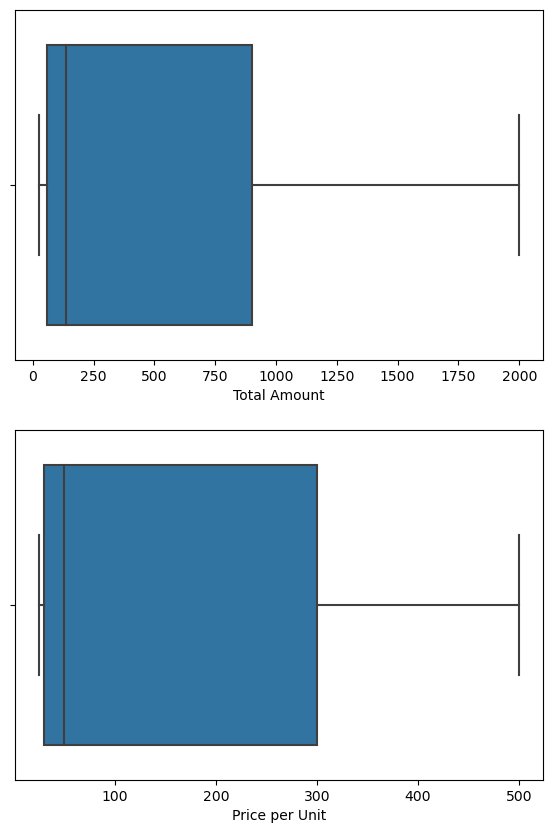

In [23]:
 plt.figure(figsize=(15,10)) # length , width
plt.subplot(2,2,1)
sns.boxplot(data["Total Amount"])

plt.subplot(2,2,3)
sns.boxplot(data["Price per Unit"])
plt.show()

In [24]:
# No Outlier Detected Therefore we do not perform outlier detection technique 

In [25]:
# Observation 1

# By using the basic steps we observe:

# Total entities in the data is 1000 and 10 columns.

# There are total five int64 and four objects data types.

# The unique values of different columns like

# Gender have two, Male and Female.
# Product have three, Beauty, Clothing and Electronic.
# There is no month to explore, the month from Date columns and add new column Month in dataset.

# And then checked the outlier.

# Checking Balance Imbalance Data

In [26]:
# converting categorical to numeric , we can do it by replace or using smote 

data['Gender'] = data['Gender'].replace({'Male':1,'Female':0})

In [27]:
data

,Transaction ID,Date,Month,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,November,CUST001,1,34,Beauty,3,50,150
1,2,2023-02-27,February,CUST002,0,26,Clothing,2,500,1000
2,3,2023-01-13,January,CUST003,1,50,Electronics,1,30,30
3,4,2023-05-21,May,CUST004,1,37,Clothing,1,500,500
4,5,2023-05-06,May,CUST005,1,30,Beauty,2,50,100
...,...,...,...,...,...,...,...,...,...,...
995,996,2023-05-16,May,CUST996,1,62,Clothing,1,50,50
996,997,2023-11-17,November,CUST997,1,52,Beauty,3,30,90
997,998,2023-10-29,October,CUST998,0,23,Beauty,4,25,100
998,999,2023-12-05,December,CUST999,0,36,Electronics,3,50,150


In [28]:
imb = data['Gender'].value_counts()
imb

0    510
1    490
Name: Gender, dtype: int64

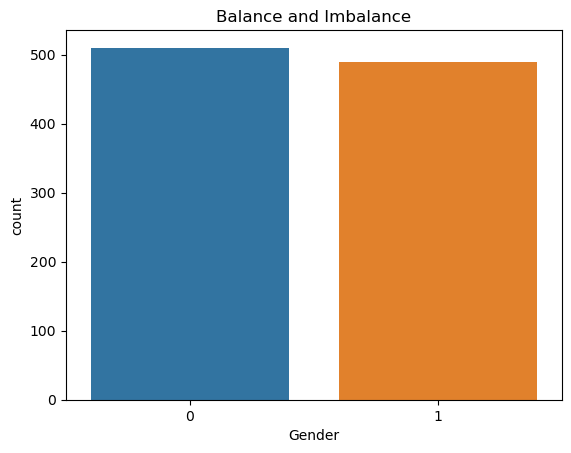

In [29]:
# checking balance and imbalance data using countplot 
sns.countplot(data['Gender'])
# Gender = {Male:1 , Female:0}
plt.title('Balance and Imbalance')
plt.show()

# Time Series Analysis 

In [30]:
# Assuming the dataset has a 'Date' column , and convert it to date format
data['Date'] = pd.to_datetime(data['Date'])

# Extract Year , quarter and month from the 'Date' column

data['Year'] = data['Date'].dt.year
data['Quarter'] = data['Date'].dt.quarter
data['Month'] = data['Date'].dt.month

In [31]:
# group by year , quarter and month and calculate the total amount of transactions 
total_amount_by_year = data.groupby('Year')["Total Amount"].sum()
total_amount_by_quarter = data.groupby(['Year','Quarter'])["Total Amount"].sum()
total_amount_by_month = data.groupby(['Year','Month'])['Total Amount'].sum()

In [32]:
print("Total number of transaction changed over year -:")
print(total_amount_by_year)

print("Total number of transaction changed over quarter -:")
print(total_amount_by_quarter)

print("Total number of transaction changed over month -:")
print(total_amount_by_month)

Total number of transaction changed over year -:
Year
2023    454470
2024      1530
Name: Total Amount, dtype: int64
Total number of transaction changed over quarter -:
Year  Quarter
2023  1          108500
      2          123735
      3           96045
      4          126190
2024  1            1530
Name: Total Amount, dtype: int64
Total number of transaction changed over month -:
Year  Month
2023  1        35450
      2        44060
      3        28990
      4        33870
      5        53150
      6        36715
      7        35465
      8        36960
      9        23620
      10       46580
      11       34920
      12       44690
2024  1         1530
Name: Total Amount, dtype: int64


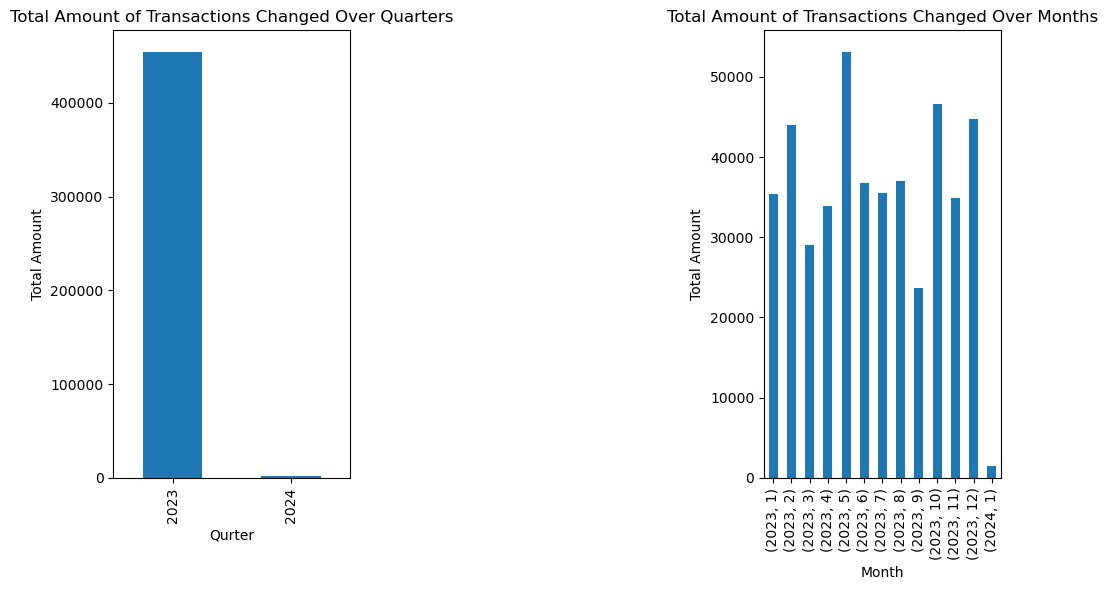

In [33]:
# Plot the Bar Graph for Total Amount Of transanction Changed Over the year , quarter and month

plt.figure(figsize=(10,6))

#Bar graph for total amount of transactions changed over years

plt.subplot(1, 3, 1)

total_amount_by_year.plot(kind='bar')

plt.title('Total Amount of Transactions Changed Over Quarters')

plt.xlabel('Qurter')

plt.ylabel('Total Amount')

#Bar graph for total amount of transactions changed over months 
plt.subplot(1, 3, 3)
total_amount_by_month.plot(kind='bar') 
plt.title('Total Amount of Transactions Changed Over Months')

plt.xlabel('Month')

plt.ylabel('Total Amount')

plt.tight_layout()

plt.show()

In [34]:
data.index

RangeIndex(start=0, stop=1000, step=1)

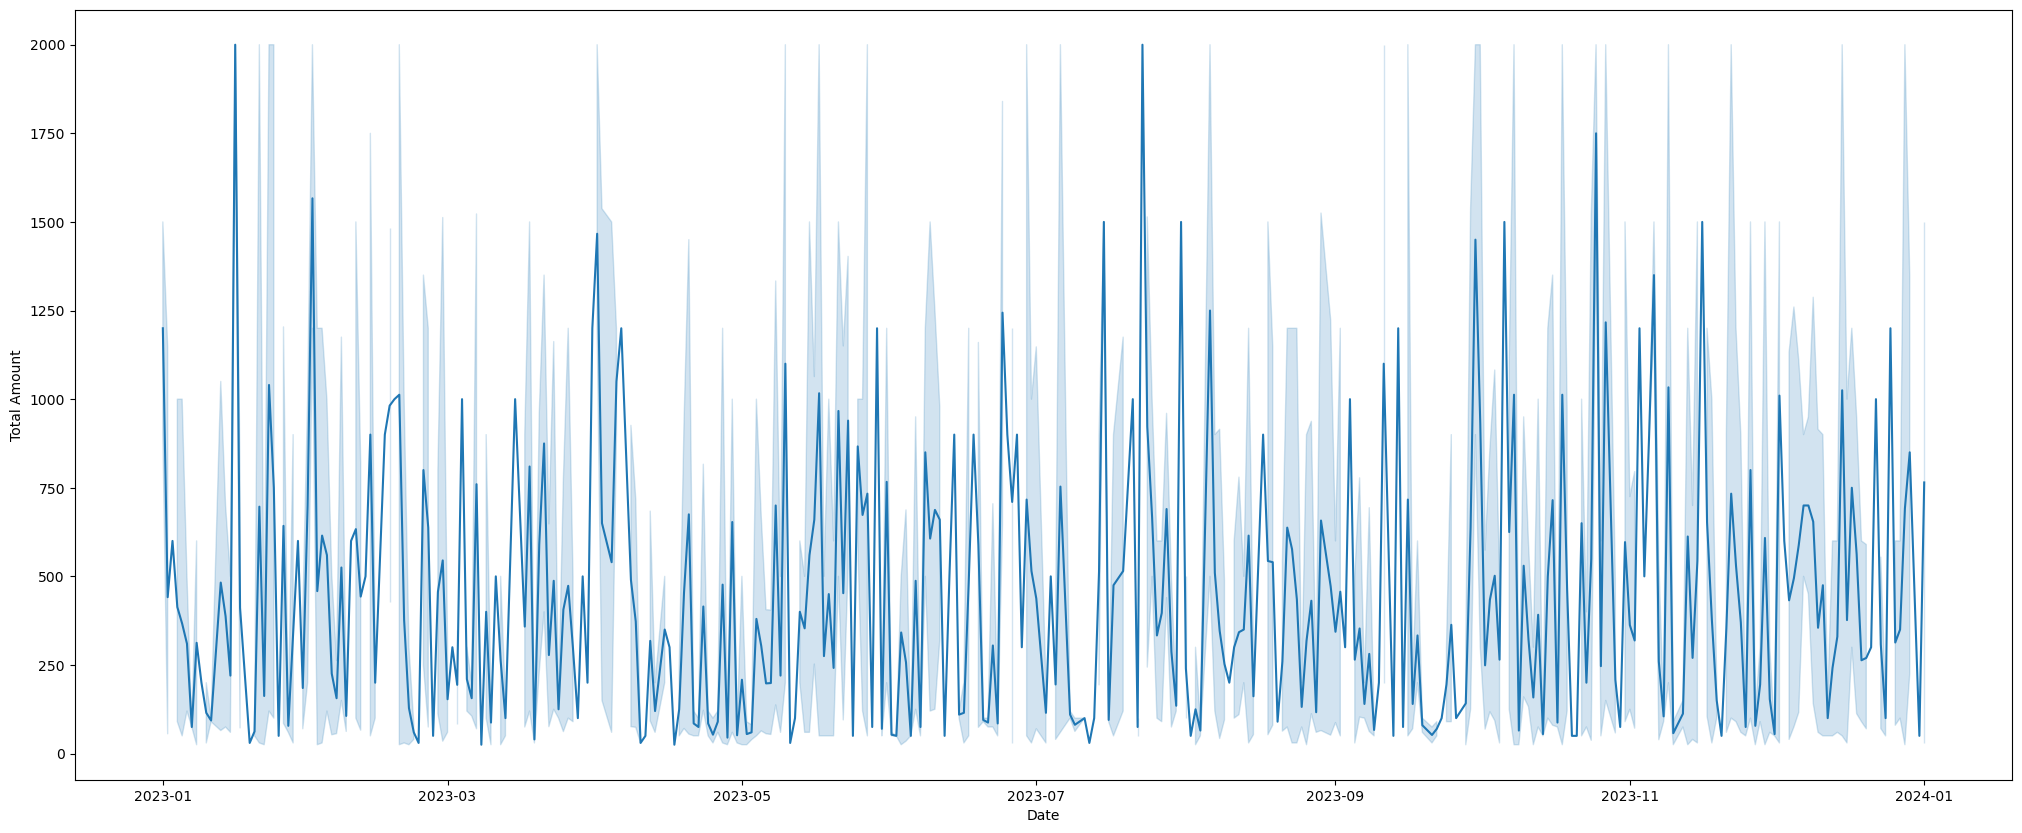

In [35]:
plt.figure(figsize=(25,10))
sns.lineplot(x = "Date", y = 'Total Amount', data=data)
plt.show()

# Sale trending over a year

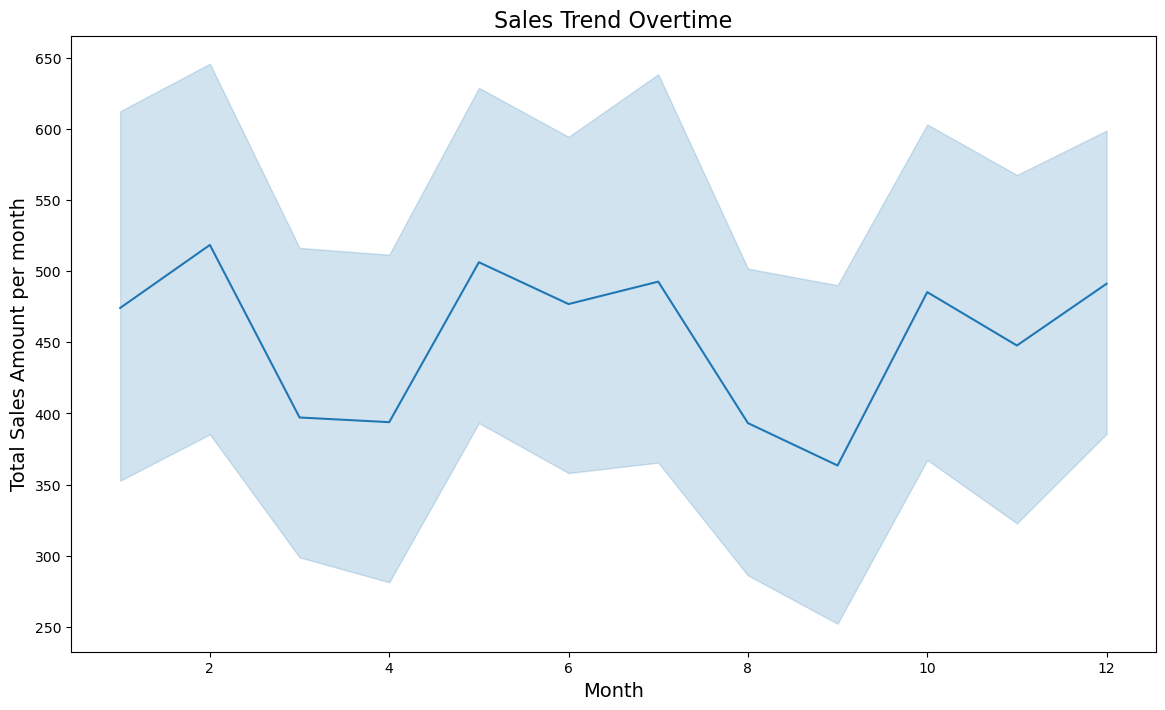

In [36]:
# Sales trends Overtime
plt.figure(figsize=(14,8))
sns.lineplot(x='Month', y='Total Amount', data= data)
plt.title('Sales Trend Overtime', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Total Sales Amount per month', fontsize=14)
plt.show()

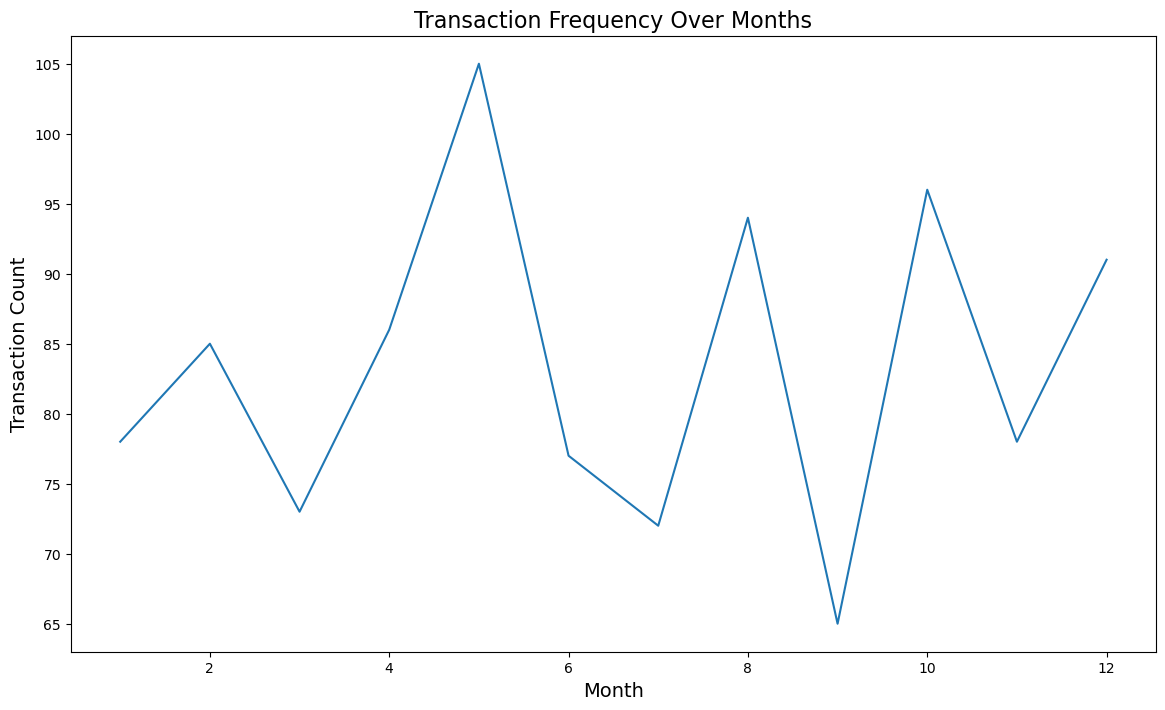

In [37]:
# transaction frequency over months

data['Month'] = data['Date'].dt.month
transaction_count = data.groupby('Month')['Transaction ID'].count()


plt.figure(figsize=(14,8))
sns.lineplot(x=transaction_count.index, y=transaction_count.values)
plt.title('Transaction Frequency Over Months', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Transaction Count', fontsize=14)
plt.show()

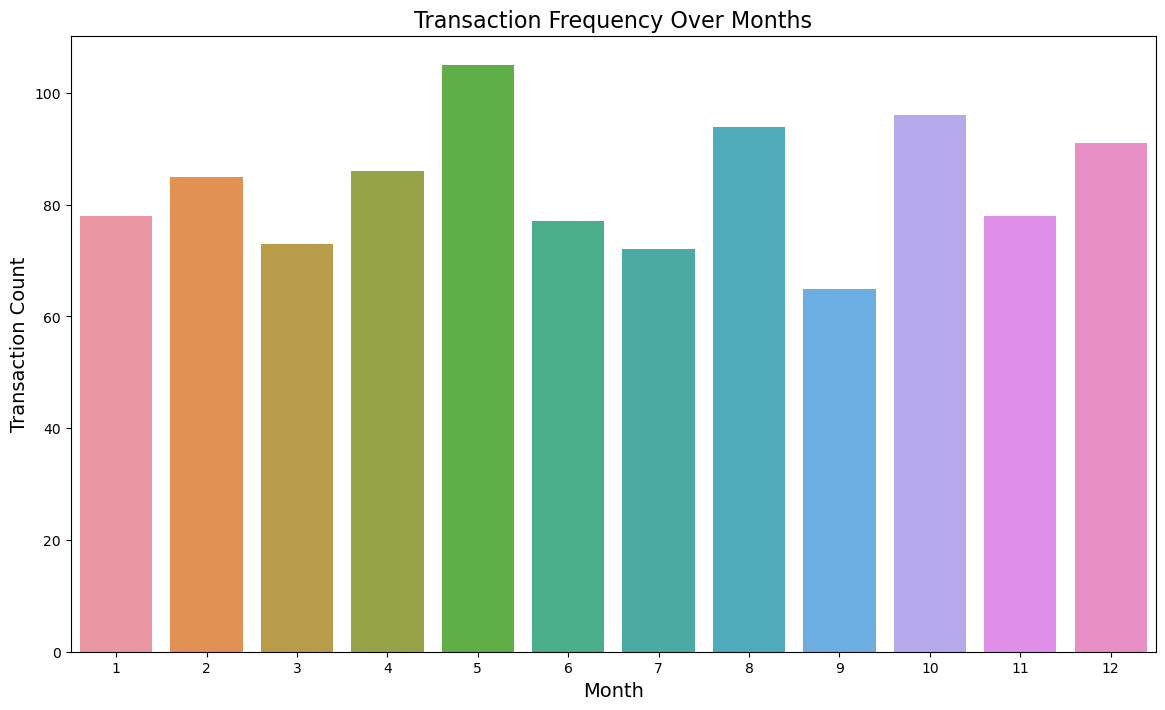

In [38]:
# bar blot
plt.figure(figsize=(14,8))
sns.barplot(x=transaction_count.index, y=transaction_count.values)
plt.title('Transaction Frequency Over Months', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Transaction Count', fontsize=14)
plt.show()

# Plot a histogram of the price per unit to visualize its distribution

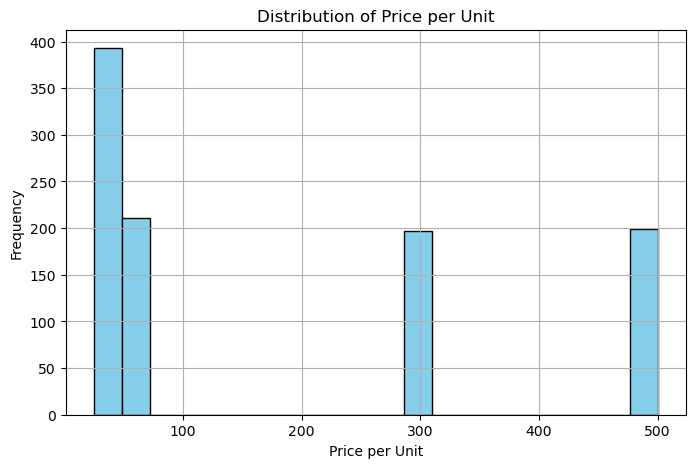

In [39]:
plt.figure(figsize=(8,5))

plt.hist(data['Price per Unit'], bins= 20, color='skyblue', edgecolor='black')

plt.title('Distribution of Price per Unit')

plt.xlabel('Price per Unit')

plt.ylabel('Frequency')

plt.grid(True)

plt.show()

# Calculate the total revenue generated from sales

In [40]:
data['Total Amount'] = data['Quantity']* data['Price per Unit']
total_amount = data['Total Amount'].sum()
print("Total Revenue Generated :- " ,total_amount)

Total Revenue Generated :-  456000


In [41]:
# Revenue over the year
monthly_totals = data.groupby('Month')['Total Amount'].sum().reset_index()
total = monthly_totals.sum()
print(monthly_totals)
print("Yearly Revenue -:" ,total)

    Month  Total Amount
0       1         36980
1       2         44060
2       3         28990
3       4         33870
4       5         53150
5       6         36715
6       7         35465
7       8         36960
8       9         23620
9      10         46580
10     11         34920
11     12         44690
Yearly Revenue -: Month               78
Total Amount    456000
dtype: int64


In [42]:
# Descriptive statistics of price per unit
price_stats = data['Price per Unit'].describe()
print(price_stats)

count    1000.000000
mean      179.890000
std       189.681356
min        25.000000
25%        30.000000
50%        50.000000
75%       300.000000
max       500.000000
Name: Price per Unit, dtype: float64


In [43]:
# Calculate the price per unit over the time 
avg_price_over_time = data.groupby('Date')['Price per Unit'].mean()
print("average price per unit by time",avg_price_over_time)

average price per unit by time Date
2023-01-01    366.666667
2023-01-02    151.250000
2023-01-03    300.000000
2023-01-04    193.333333
2023-01-05    191.666667
                 ...    
2023-12-27    175.000000
2023-12-28    183.333333
2023-12-29    281.250000
2023-12-31     25.000000
2024-01-01    265.000000
Name: Price per Unit, Length: 345, dtype: float64


# Sale of product category per month

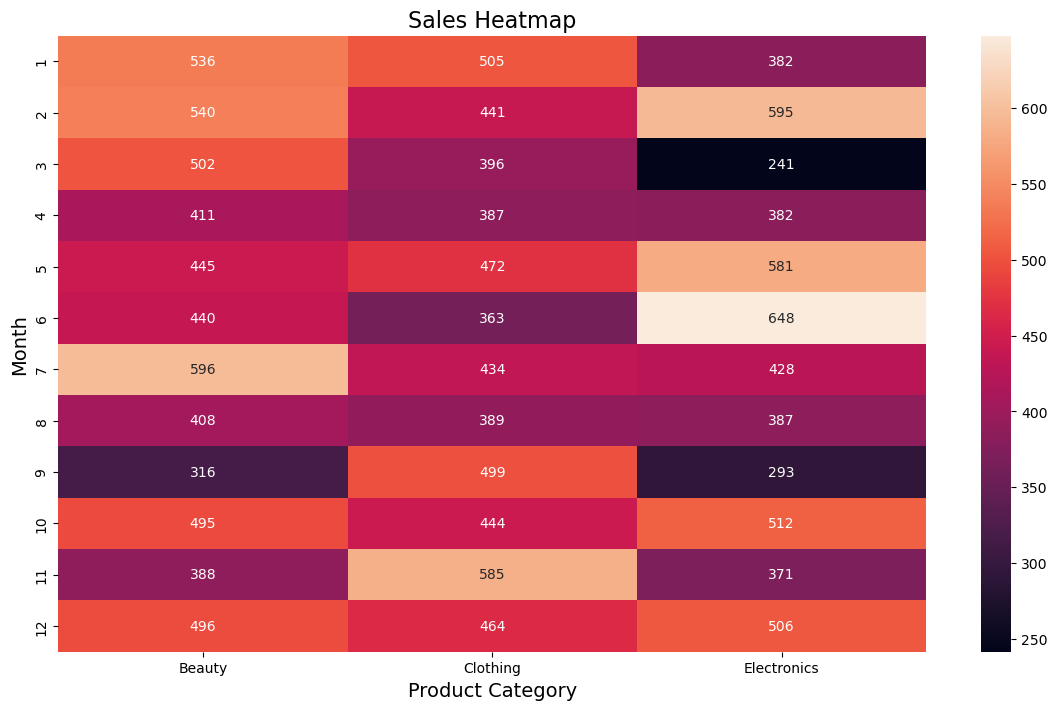

In [44]:
# Sales of Product Categories per month
heatmap = data.pivot_table(index='Month', columns='Product Category', values='Total Amount')
plt.figure(figsize=(14,8))
sns.heatmap(heatmap, annot=True, fmt='.0f')
plt.title('Sales Heatmap', fontsize=16)
plt.xlabel('Product Category', fontsize=14)
plt.ylabel('Month', fontsize=14)
plt.show()

# Costumer Age Over Product Quantity 

In [45]:
# binning Age 
age_bins = [0, 18, 25, 35, 50, 100]
age_group = ['0-18', '19-25', '26-35', '36-50', '50+']
df['Age Group'] = pd.cut(data['Age'], bins = age_bins, labels=age_group)
df.head()

,Transaction ID,Age,Quantity,Price per Unit,Total Amount,Age Group
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,NaN
mean,500.500000,41.39200,2.514000,179.890000,456.000000,NaN
std,288.819436,13.68143,1.132734,189.681356,559.997632,NaN
min,1.000000,18.00000,1.000000,25.000000,25.000000,NaN
25%,250.750000,29.00000,1.000000,30.000000,60.000000,NaN


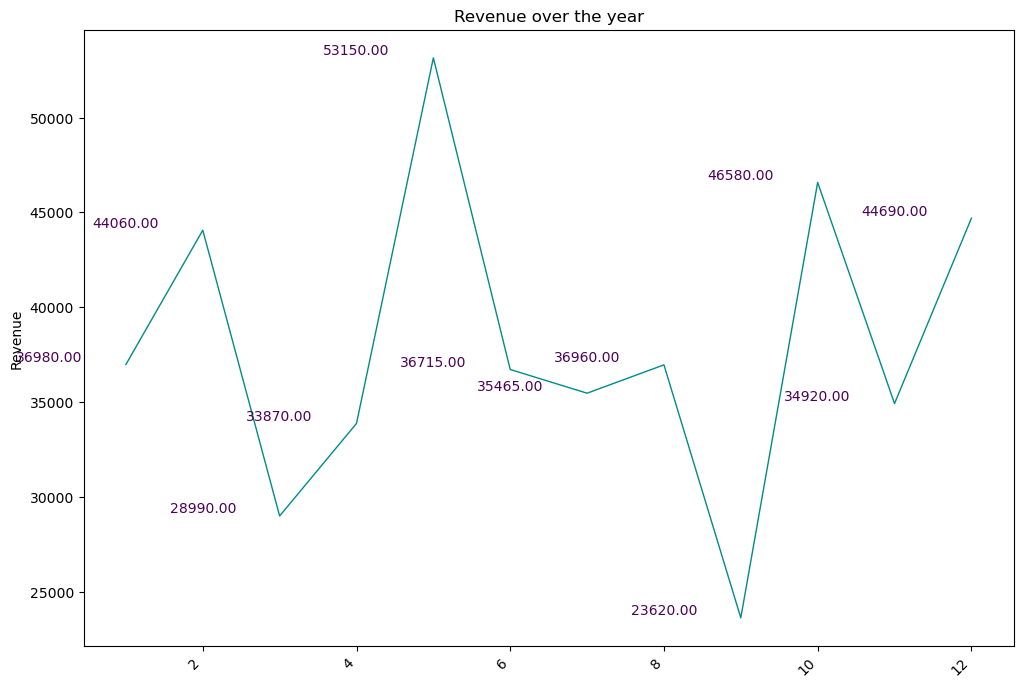

In [46]:
# Revenue over the year

# Create the monthly totals DataFrame
monthly_totals = data.groupby('Month')['Total Amount'].sum().reset_index()

# Create the line plot
plt.figure(figsize=(12, 8))
sns.lineplot(x='Month', y='Total Amount', data=monthly_totals, color='#008B8B', linewidth=1)

# Add labels and title
plt.title('Revenue over the year')
plt.xlabel('')
plt.ylabel('Revenue')

# Add data labels
for i, total in enumerate(monthly_totals['Total Amount']):
    plt.text(i, total, f"{total:.2f}", va='bottom', ha='center', color='#4B0055', fontsize=10)

# Rotate the x-axis labels
plt.xticks(rotation=45, ha='right')

plt.show()

In [47]:
cate_counts = data['Product Category'].value_counts()
cate_counts

Clothing       351
Electronics    342
Beauty         307
Name: Product Category, dtype: int64

In [48]:
# Product Category by 
df = data.groupby(['Product Category'], as_index = False)['Quantity'].sum().sort_values(by = 'Product Category', ascending = True)

In [49]:
df

,Product Category,Quantity
0,Beauty,771
1,Clothing,894
2,Electronics,849


In [50]:
cate_dist = (cate_counts / cate_counts.sum()) * 100
cate_dist = cate_dist.reset_index()
cate_dist.columns = ['Product Category', 'Percentage']
cate_dist

,Product Category,Percentage
0,Clothing,35.1
1,Electronics,34.2
2,Beauty,30.7


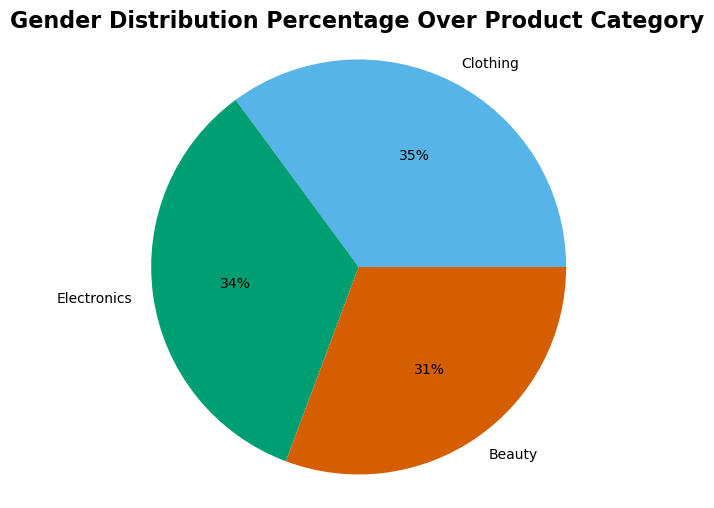

In [51]:
cate_counts = data['Product Category'].value_counts()

# Calculate the gender distribution percentage
cate_dist = (cate_counts / cate_counts.sum()) * 100
cate_dist = cate_dist.reset_index()
cate_dist.columns = ['Product Category', 'Percentage']

# Create the pie chart
plt.figure(figsize=(8, 6))
plt.pie(cate_dist['Percentage'], labels=cate_dist['Product Category'], autopct='%.0f%%', colors=['#56b4e9', '#009e73','#d55e00'])

# Add a title and make the plot circular
plt.title('Gender Distribution Percentage Over Product Category', fontsize=16, fontweight='bold')
plt.axis('equal')

# Display the plot
plt.show()

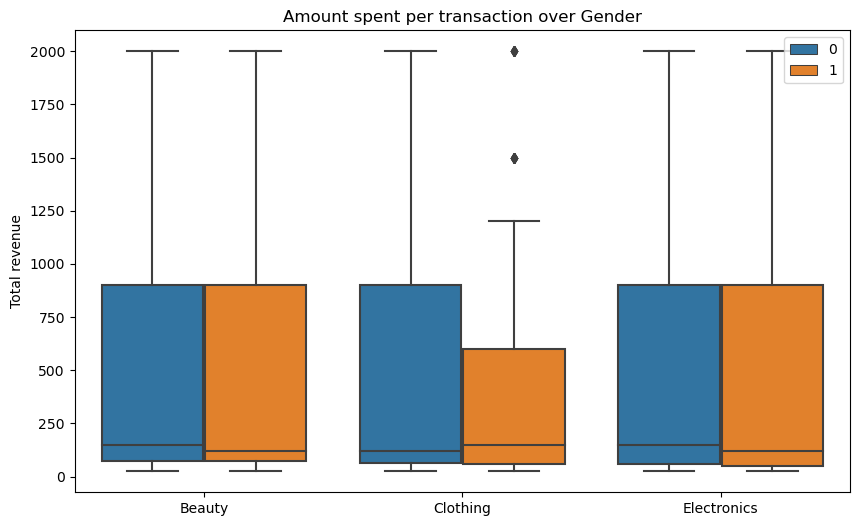

In [52]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="Product Category", y="Total Amount", hue="Gender", data=data)

# Customize the plot
plt.title("Amount spent per transaction over Gender")
plt.xlabel("")
plt.ylabel("Total revenue")
plt.legend(loc='upper right')
plt.show()

# Observation 2

In [53]:
# By observing the above charts:

# Next year will sales increase and company get in profit

# Month may sale was high. There must be Spring season and people buy cloth during this season.

<Figure size 1200x800 with 0 Axes>

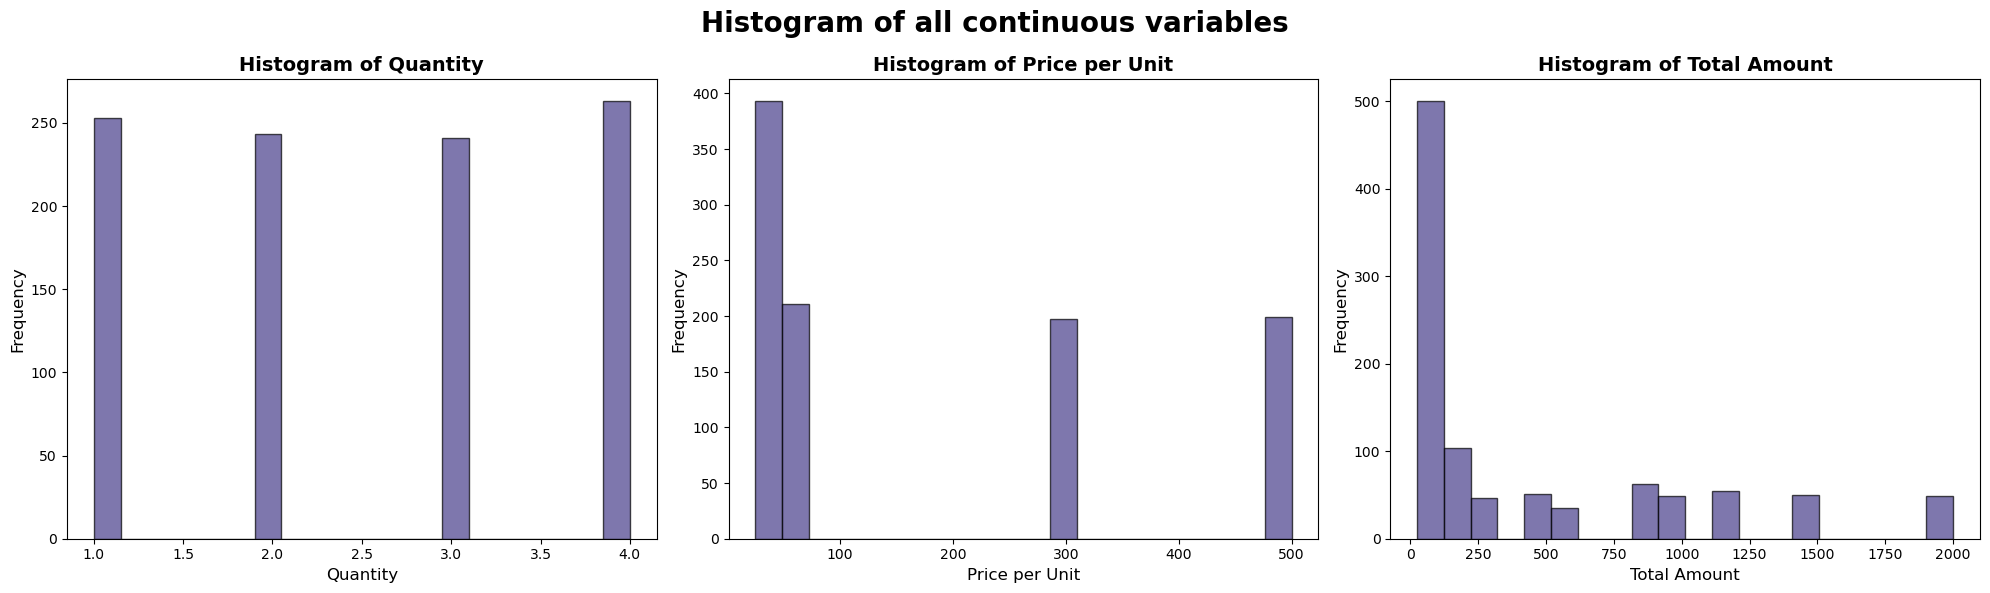

In [54]:
# frequency of the continues variables
df_ = data[['Gender', 'Age', 'Product Category', 'Quantity', 'Price per Unit', 'Total Amount']]

# Create the histogram plot
plt.figure(figsize=(12, 8))

# Plot the histograms
fig, axs = plt.subplots(1, 3, figsize=(20, 6))

axs[0].hist(df_['Quantity'], bins=20, color='#483D8B', edgecolor='black', alpha=0.7)
axs[0].set_title('Histogram of Quantity', fontsize=14, fontweight='bold')
axs[0].set_xlabel('Quantity', fontsize=12)
axs[0].set_ylabel('Frequency', fontsize=12)

axs[1].hist(df_['Price per Unit'], bins=20, color='#483D8B', edgecolor='black', alpha=0.7)
axs[1].set_title('Histogram of Price per Unit', fontsize=14, fontweight='bold')
axs[1].set_xlabel('Price per Unit', fontsize=12)
axs[1].set_ylabel('Frequency', fontsize=12)

axs[2].hist(df_['Total Amount'], bins=20, color='#483D8B', edgecolor='black', alpha=0.7)
axs[2].set_title('Histogram of Total Amount', fontsize=14, fontweight='bold')
axs[2].set_xlabel('Total Amount', fontsize=12)
axs[2].set_ylabel('Frequency', fontsize=12)

plt.suptitle('Histogram of all continuous variables', fontsize=20, fontweight='bold')
plt.tight_layout()
plt.show()

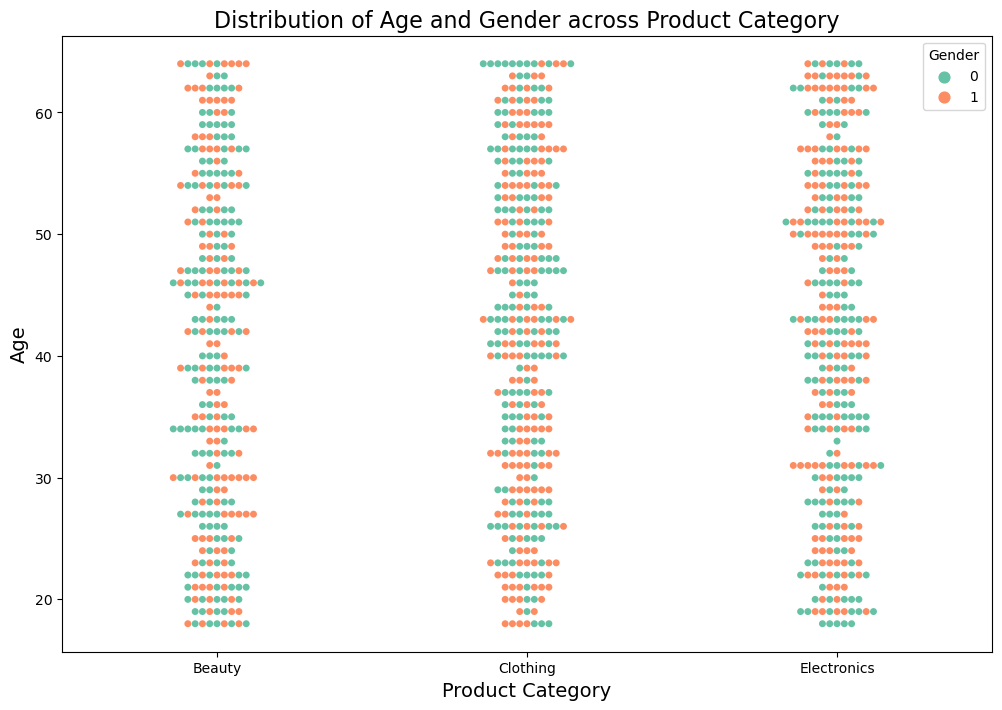

In [55]:
# Distributing 'Age' and 'Gender' columns across Product Category
plt.figure(figsize=(12,8))
sns.swarmplot(x='Product Category', y='Age', hue='Gender', data=data, palette='Set2')
plt.title('Distribution of Age and Gender across Product Category', fontsize=16)
plt.xlabel('Product Category', fontsize=14)
plt.ylabel('Age', fontsize=14)
plt.legend(title='Gender', loc ='upper right', fontsize=10)
plt.show()

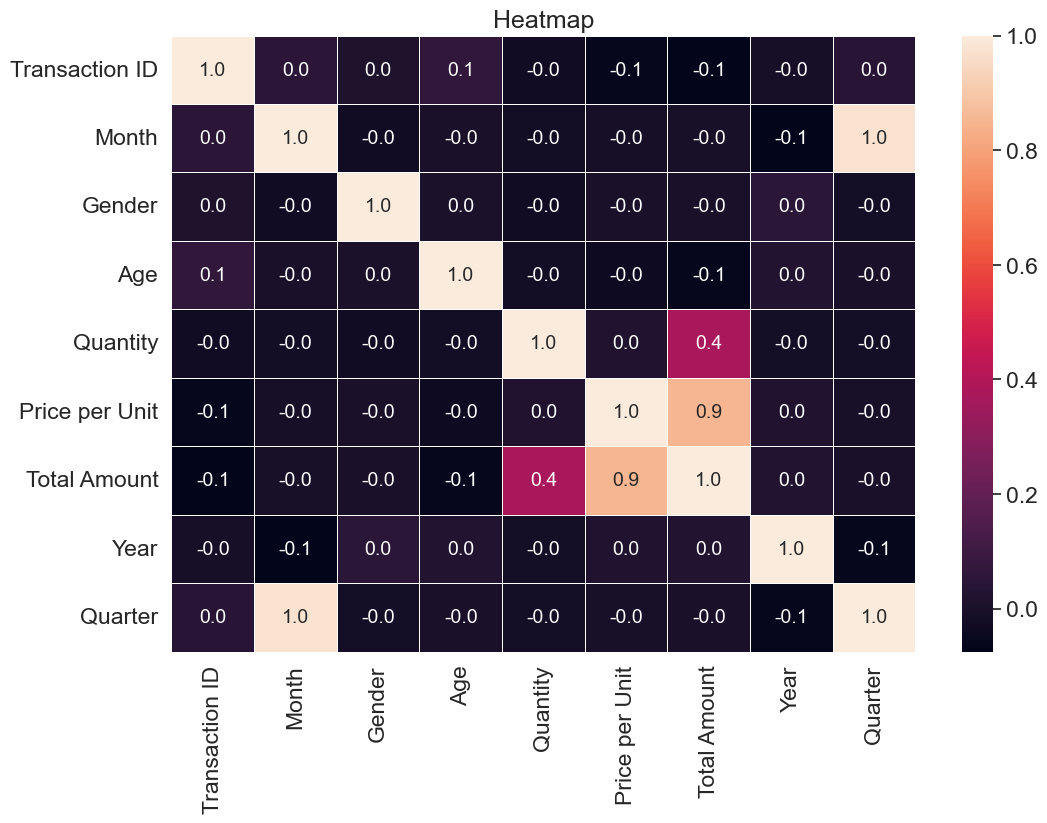

In [56]:
correlation=data[data.dtypes[data.dtypes == 'int64'].index].corr()
sns.set(font_scale=1.5)
plt.figure(figsize = (12,8))
plt.title("Heatmap", fontsize=18)
ax = sns.heatmap(correlation, annot=True,annot_kws={"size": 14},fmt='.1f', linewidths=.5)

# Overall obervsed

In [57]:
# While clothing is the best-selling category in terms of quantity, electronics generates the most revenue, closely followed by clothing.

# Clothing: This category generates the most revenue for women. Men purchase more than women in terms of quantity but spend less on average in this category.

# Electronic: This categoty men buy less than women in terms of quantity, but spend more on average in this category.

# Beauty: This is the category with the lowest revenue and the lowest sales. In this category, revenue is higher for women than for men.